In [2]:
from matplotlib import pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [3]:
numberOfFeatures = 50
attributesInput = layers.Input(shape=(numberOfFeatures,))
attributes = layers.Dense(128 * 128 * numberOfFeatures)(attributesInput)
attributes = layers.Reshape([128, 128, numberOfFeatures])(attributes)

In [4]:
imageShape = (128, 128, 3)
imageInput = layers.Input(shape=imageShape)

In [15]:
merged = layers.Concatenate()([imageInput, attributes])
# 128x128 => 64x64
# 128x128 => 32x32
discriminator = layers.Conv2D(64, (5,5), (4,4), padding='same')(merged)
discriminator = layers.LeakyReLU(0.2)(discriminator)
discriminator = keras.layers.Dropout(0.3)(discriminator)
# # 64x64 => 32x32
# discriminator = layers.Conv2D(64, (5,5), (2,2), padding='same')(discriminator)
# discriminator = layers.LeakyReLU(0.2)(discriminator)
# discriminator = keras.layers.Dropout(0.3)(discriminator)
# 32x32 => 16x16
discriminator = layers.Conv2D(64, (5,5), (2,2), padding='same')(discriminator)
discriminator = layers.LeakyReLU(0.2)(discriminator)
discriminator = keras.layers.Dropout(0.3)(discriminator)
# 16x16 => 8x8
discriminator = layers.Conv2D(128, (5,5), (2,2), padding='same')(discriminator)
discriminator = layers.LeakyReLU(0.2)(discriminator)
discriminator = keras.layers.Dropout(0.3)(discriminator)
# 8x8 => 4x4
discriminator = layers.Conv2D(128, (5,5), (2,2), padding='same')(discriminator)
discriminator = layers.LeakyReLU(0.2)(discriminator)
discriminator = keras.layers.Dropout(0.3)(discriminator)
# 4x4 => 16 x neurons
discriminator = keras.layers.Flatten()(discriminator)
discriminator = layers.Dense(1, activation='sigmoid')(discriminator)

discriminatorModel = keras.models.Model([attributesInput, imageInput], discriminator)

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 819200)       41779200    input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 128, 128, 50) 0           dense[0][0]                      
______________________________________________________________________________________

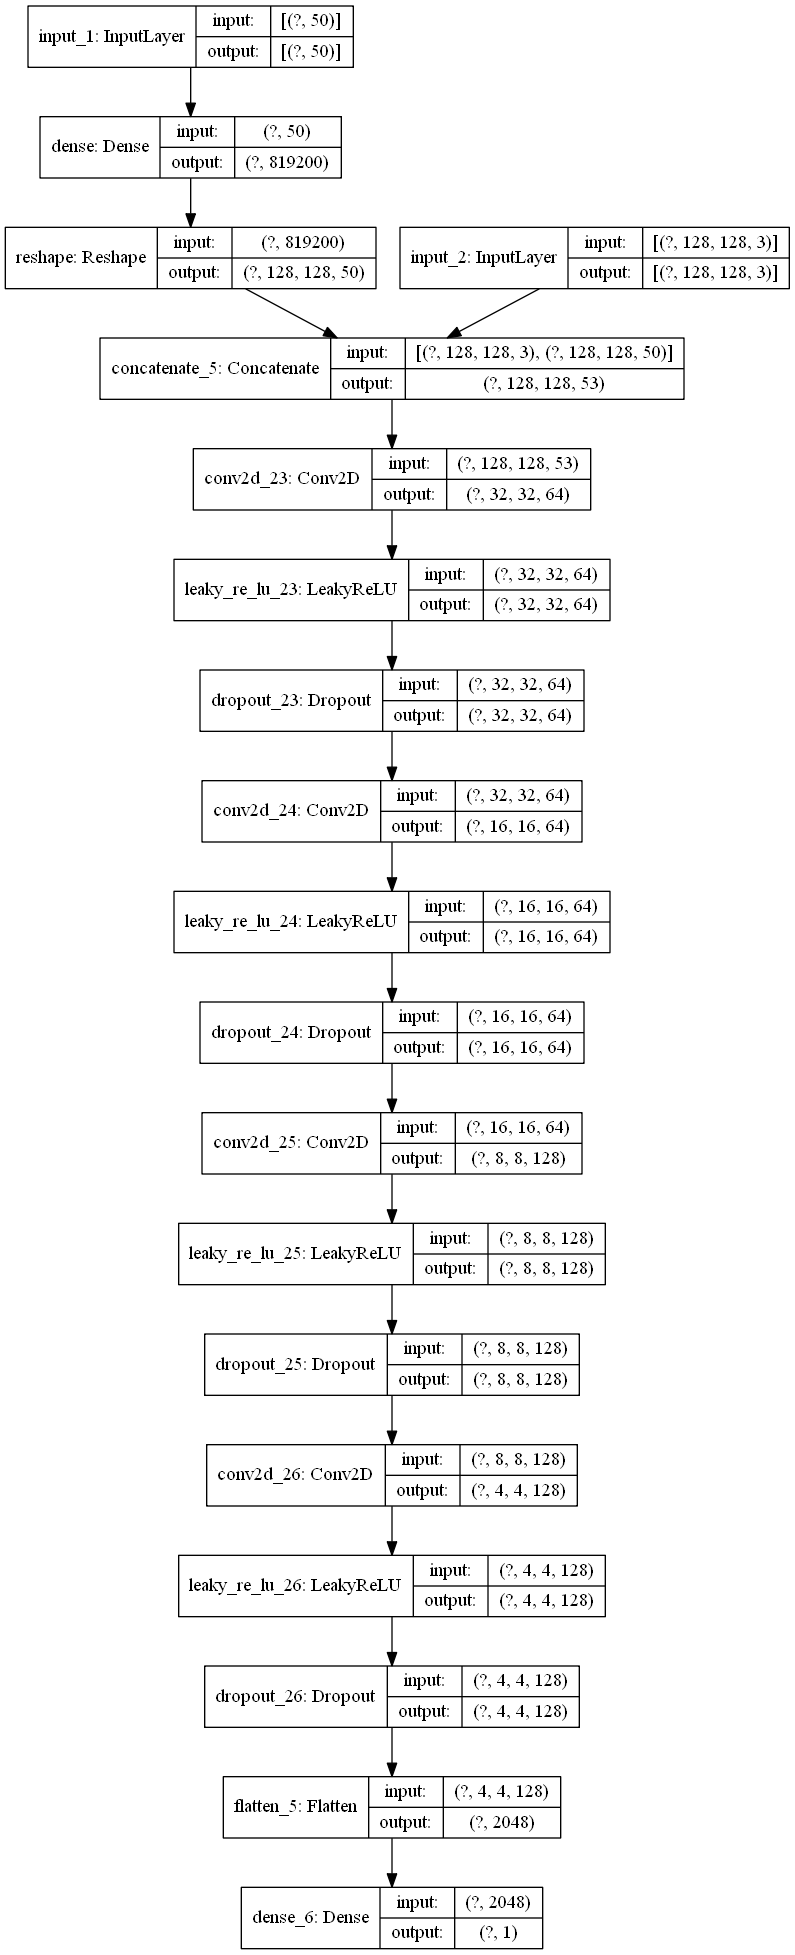

In [16]:
discriminatorModel.summary()
plot_model(discriminatorModel, to_file='discriminator.png', show_shapes=True, show_layer_names=True)